# Fantasy Football Draft Preparation

## *A data science approach to preparing for the 2020 fantasy football season.*

### A little bit of background.

As a student of data science and a fan of most things football, I jumped at the chance to test out some of my newly found data science chops on optimizing my fantasy football roster.  I could just rely on projections and recommendations from fantasy football pros, but where's the fun in that?  To expand on this, there are so many sources to get projections and rankings for players, so why not use multiple sources to improve my roster?

This article is intended to demonstrate the method I used to build select quarterbacks, tight-ends, wide receivers, and running backs for my fantasy football team.  I would like to stress that this is by no means the best method, or the only method, but it is a method.  

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fant_2019.csv")

In [3]:
df[["Fantasy FantPt", "Fantasy PPR", "Fantasy DKPt", "Fantasy FDPt"]] = df[["Fantasy FantPt", "Fantasy PPR", "Fantasy DKPt", "Fantasy FDPt"]].fillna(0) # filling missing fantasy values with 0

### The data.

The data used for this project covers the entirety of the 2019 NFL season.  Our data set comes from [Pro Football Reference](https://www.pro-football-reference.com/fantasy/index.htm) and includes the following columns:

- Player: the name of the player
- Tm: three letter abreviation for the player's team
- FantPos: the player's position on the field
- Games G: number of games played in the 2019 season
- Fantasy FantPt: Pro Football Reference's official scoring method
- Fantasy PPR: a slightly modified version of the official scoring method that includes additional scoring oppertunities
- Fantasy DKPt: Draft Kings official scoring method
- Fantasy FDPt: Fanduel's official scoring method

In [4]:
df.drop("Fantasy VBD", axis=1, inplace=True)

In [5]:
df.head()

,Player,Tm,FantPos,Games G,Fantasy FantPt,Fantasy PPR,Fantasy DKPt,Fantasy FDPt
0,Christian McCaffrey*+,CAR,RB,16,355.0,471.2,477.2,413.2
1,Lamar Jackson*+,BAL,QB,15,416.0,415.7,429.7,421.7
2,Derrick Henry*,TEN,RB,15,277.0,294.6,303.6,285.6
3,Aaron Jones,GNB,RB,16,266.0,314.8,322.8,290.3
4,Ezekiel Elliott*,DAL,RB,16,258.0,311.7,319.7,284.7


### Data cleaning.

In order to properly work with our data, we must clean it and investigate it.  In other words, the data must be formatted to account for missing values, outliers, and abnormal text (this last point is more of a personal preference in context of this project).  

For example, the player names should be normalized to remove the asterisks and plus signs.  Although this is not necessary, cleaning it now will allow us to make future enrichment much easier.  

The first notable issue encountered in this particular data set was a high concentration of missing values.  Knowing that the data is recording fantasy football scores, the assumption was made that a player with missing scores likely did not earn any points.  We can use the pandas method `fillna()` to replace missing values within specified columns with 0.

After accounting for missing values for the scores columns, the next item to consider is the player position.  A handful of players in the data set had missing values for their on-field position.  These players tended to reside at the bottom of the rankings in terms of fantasy points, so the decision was made to drop these players completely (sorry Greg Dortch).

### A touch of feature manipulation.

Feature manipulation, or feature engineering, is the process of manipulating your data to make work better for you and machine learning models.  This is the step where having domain knowledge is crucial to improving the performance of said models.

As we all know, NFL players can have 'hot' games.  As great as this is for someone with that player, these games don't come every sunday.  To try and mitigate this, we'll change our score columns.

Using the games played column, we'll create new columns that take the estimate of fantasy points scored per game.  One way to do this is with a little help of a 'for' loop.  In essence, a 'for' loop lets you run code in a repetative process.  Rather than typing out each new column by hand, we can just tell Python to do it.

Now we have new columns that provide us with an estimate of how many fantasy points each player scored per game they played.  We're ready to begin looking at some patterns with these new features.

In [6]:
for col in df.columns[4:]:
    df[f"{col} Per Game"] = df[col] / df["Games G"]
    df.drop(col, axis=1, inplace=True) # dropping total season points after getting the per game values

In [7]:
import re

def str_fixer(text: str):
    """uses predetermined regex pattern to normalize text"""
    result = re.sub(r"[*+]", "", text)
    return result

In [8]:
df = df[df["FantPos"].isna() == False]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 618
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Player                   557 non-null    object 
 1   Tm                       557 non-null    object 
 2   FantPos                  557 non-null    object 
 3   Games G                  557 non-null    int64  
 4   Fantasy FantPt Per Game  557 non-null    float64
 5   Fantasy PPR Per Game     557 non-null    float64
 6   Fantasy DKPt Per Game    557 non-null    float64
 7   Fantasy FDPt Per Game    557 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 39.2+ KB


- looks like our data was read in as needed

In [10]:
df.describe()

,Games G,Fantasy FantPt Per Game,Fantasy PPR Per Game,Fantasy DKPt Per Game,Fantasy FDPt Per Game
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,11.210054,4.758135,6.342174,6.681277,5.625549
std,4.868860,4.945777,5.770024,6.008850,5.412345
min,1.000000,-2.000000,-1.400000,-0.400000,-1.900000
25%,7.000000,0.937500,1.566667,1.627273,1.250000
50%,13.000000,3.000000,4.453846,4.881250,3.780000
75%,16.000000,7.642857,10.221429,10.618750,9.043750
max,17.000000,27.733333,29.450000,29.825000,28.113333


- draft kings gives out higher fantasy scores
- fantasy vbd is the lowest, but the values are not as varied and there are no negative scores (not the case for the others)
    - i should see what this is
- all fantasy scores appear to be right-skewed
    - probably since some players are much better than others

In [11]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("fivethirtyeight")
import seaborn as sns

<AxesSubplot:>

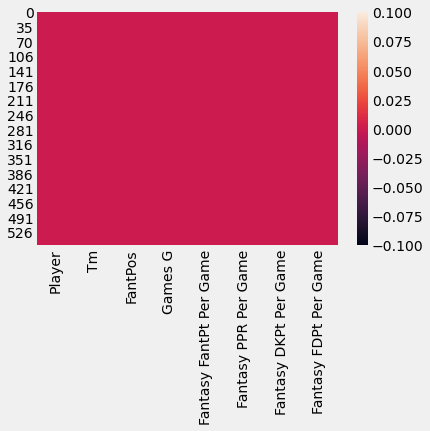

In [12]:
sns.heatmap(df.isna())

- might consider dropping Fantasy VBD since there are so many missing values
- should also investigate rows where position is missing
- for missing fantasy values, we'll input 0
    - the assumption is that if there is no data here, the players did not score any points, justifying a 0

<AxesSubplot:>

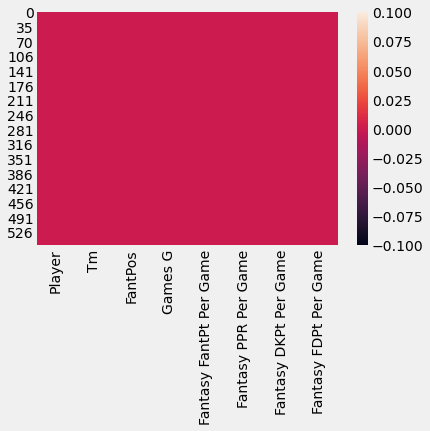

In [13]:
sns.heatmap(df.isna())

- fantasy scores are now filled

In [14]:
df[df["FantPos"].isna()]

,Player,Tm,FantPos,Games G,Fantasy FantPt Per Game,Fantasy PPR Per Game,Fantasy DKPt Per Game,Fantasy FDPt Per Game


- dropping players with no position

In [15]:
# df.drop("Fantasy VBD", axis=1, inplace=True) # dropping vbd column

In [16]:
df.head()

,Player,Tm,FantPos,Games G,Fantasy FantPt Per Game,Fantasy PPR Per Game,Fantasy DKPt Per Game,Fantasy FDPt Per Game
0,Christian McCaffrey*+,CAR,RB,16,22.187500,29.450000,29.825000,25.825000
1,Lamar Jackson*+,BAL,QB,15,27.733333,27.713333,28.646667,28.113333
2,Derrick Henry*,TEN,RB,15,18.466667,19.640000,20.240000,19.040000
3,Aaron Jones,GNB,RB,16,16.625000,19.675000,20.175000,18.143750
4,Ezekiel Elliott*,DAL,RB,16,16.125000,19.481250,19.981250,17.793750


<AxesSubplot:>

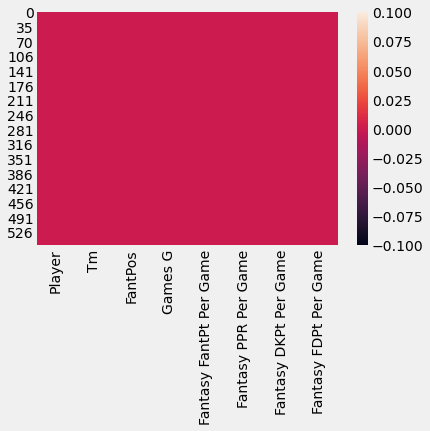

In [17]:
sns.heatmap(df.isna())

- all values are filled

In [18]:
df["Player"] = df["Player"].apply(str_fixer)

In [19]:
df.head()

,Player,Tm,FantPos,Games G,Fantasy FantPt Per Game,Fantasy PPR Per Game,Fantasy DKPt Per Game,Fantasy FDPt Per Game
0,Christian McCaffrey,CAR,RB,16,22.187500,29.450000,29.825000,25.825000
1,Lamar Jackson,BAL,QB,15,27.733333,27.713333,28.646667,28.113333
2,Derrick Henry,TEN,RB,15,18.466667,19.640000,20.240000,19.040000
3,Aaron Jones,GNB,RB,16,16.625000,19.675000,20.175000,18.143750
4,Ezekiel Elliott,DAL,RB,16,16.125000,19.481250,19.981250,17.793750


- text is normalized

In [20]:
df.head()

,Player,Tm,FantPos,Games G,Fantasy FantPt Per Game,Fantasy PPR Per Game,Fantasy DKPt Per Game,Fantasy FDPt Per Game
0,Christian McCaffrey,CAR,RB,16,22.187500,29.450000,29.825000,25.825000
1,Lamar Jackson,BAL,QB,15,27.733333,27.713333,28.646667,28.113333
2,Derrick Henry,TEN,RB,15,18.466667,19.640000,20.240000,19.040000
3,Aaron Jones,GNB,RB,16,16.625000,19.675000,20.175000,18.143750
4,Ezekiel Elliott,DAL,RB,16,16.125000,19.481250,19.981250,17.793750


- created fantasy metrics per game
- trying to get a better idea of per game performance instead of overall season performance

### Visualization.

Let's take a look and see just how our scoring services dish out their ratings.

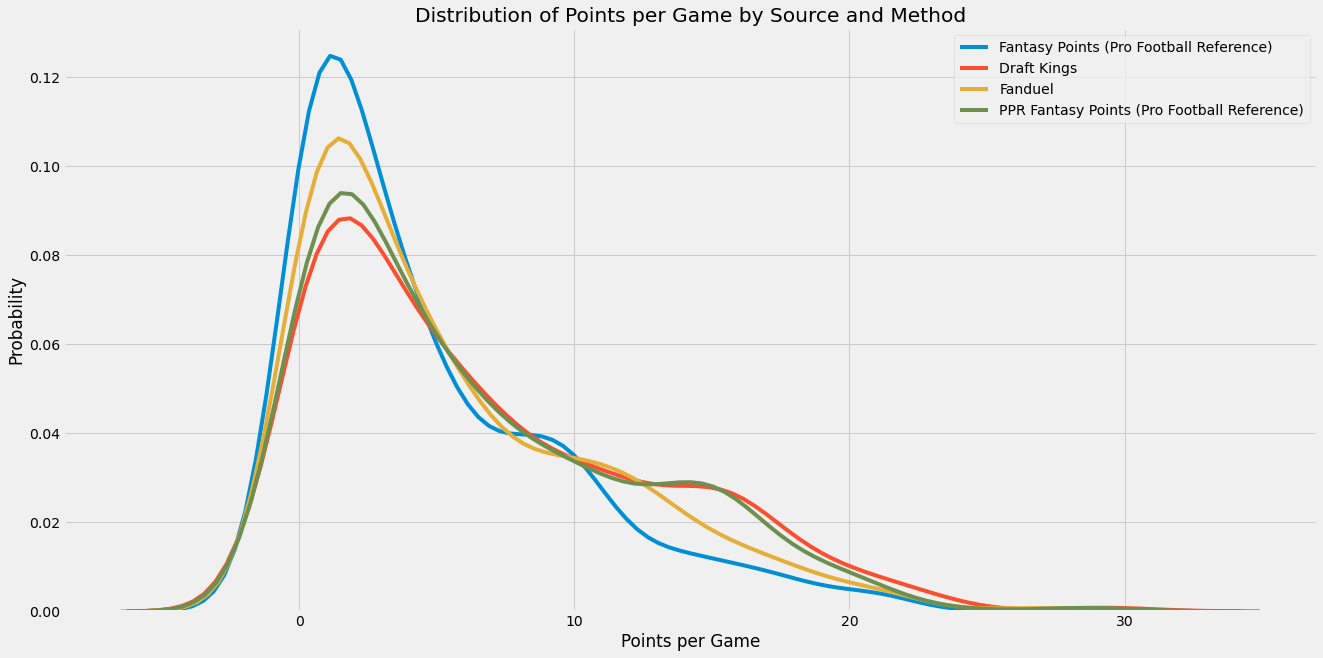

In [21]:
plt.figure(figsize=(20,10))
sns.kdeplot(df["Fantasy FantPt Per Game"], label="Fantasy Points (Pro Football Reference)")
sns.kdeplot(df["Fantasy DKPt Per Game"], label="Draft Kings")
sns.kdeplot(df["Fantasy FDPt Per Game"], label="Fanduel")
sns.kdeplot(df["Fantasy PPR Per Game"], label="PPR Fantasy Points (Pro Football Reference)")
plt.xlabel("Points per Game")
plt.ylabel("Probability")
plt.title("Distribution of Points per Game by Source and Method")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

The first thing to notice here is the asymetrical nature of the plot above.  Notice how the four peaks are right around the 2-3 point range?  This tells us that a lot of the players in our data set fall into this category.  This makes sense since our high-scoring players are not the majority.  

The main take-away from this chart is that the four sources include in this project do not agree on how to score points, or they simply have different methods of scoring.  But what does this mean for the average fantasy football enthusiast?  It means that it can make choosing the right players very confusing and costly depending on the source you're looking at.  

But there is another way, we can use the power of data science!  Rather than looking at only one of these sources or scouring the internet manually, why not group players based on a variety of scores?  

- all distributions are right-skewed
- draft kings awards higher points
- fanduel and ppr method score moderately
- standard fantasy points is the least generous

## Modeling



As mentioned above, the goal here is to group players based on a variety of scores.  This sounds like a classic clustering problem.

Cluster analysis, or cluster modeling, is the method of gathering objects that are similar into groups.  For example, say we have a sample of NBA players and a sample of elementary school students.  One thing we could do to differentiate the students from the NBA players is to record their heights.  As we all know, NBA players are much taller than first graders (don't quote me on this), making height a good metric to classify students vs. NBA players.

However, in our example above, we know that there are two groups, students and NBA players.  We need to use an unsupervised method to determine how many groups or tiers exist within our data.  To do this, we'll use a K-means algorithm.

To get a better understanding of what the K-means algorithm does, I'll refer to an article from [Dr. Michael J. Garbade](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1).  

- We define the number of clusters (commonly denoted as $k$) which refers to the number of centroids (a centroid represents the center of a given cluster or group)
- Data points are assigned to the clusters by reducing the in-cluster sum of squares
- The process repeats until clusters have been minimized

To wrap this back to our student vs. NBA player example, we know that we have two groups here.  For this case, we would assign the K-means alogrithm with a value of two (AKA: two groups).  Due to the signficant size gap between 8 year olds and 20-something year old professional athletes, our two centroids would fall somewhere around the average for each group.  Just to be safe though, the algorithm measures the distance between each person and the centroid to adjust to the optimal location (in essence).

So then how do we do this?  And also, how many clusters should we create?

One way we can determine the optimum number of clusters is by using the ['Elbow Method'](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/).  The 'Elbow Method' compares the in-cluster sum of squares accross different centroid configurations.  Basically, it helps us determine how many clusters we should create.  

We can use a 'for' loop again to our advantage by testing out a list of different cluster options and plotting them.  By looking at the figure below, you can see why this is called the 'Elbow Method'.   


In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans()

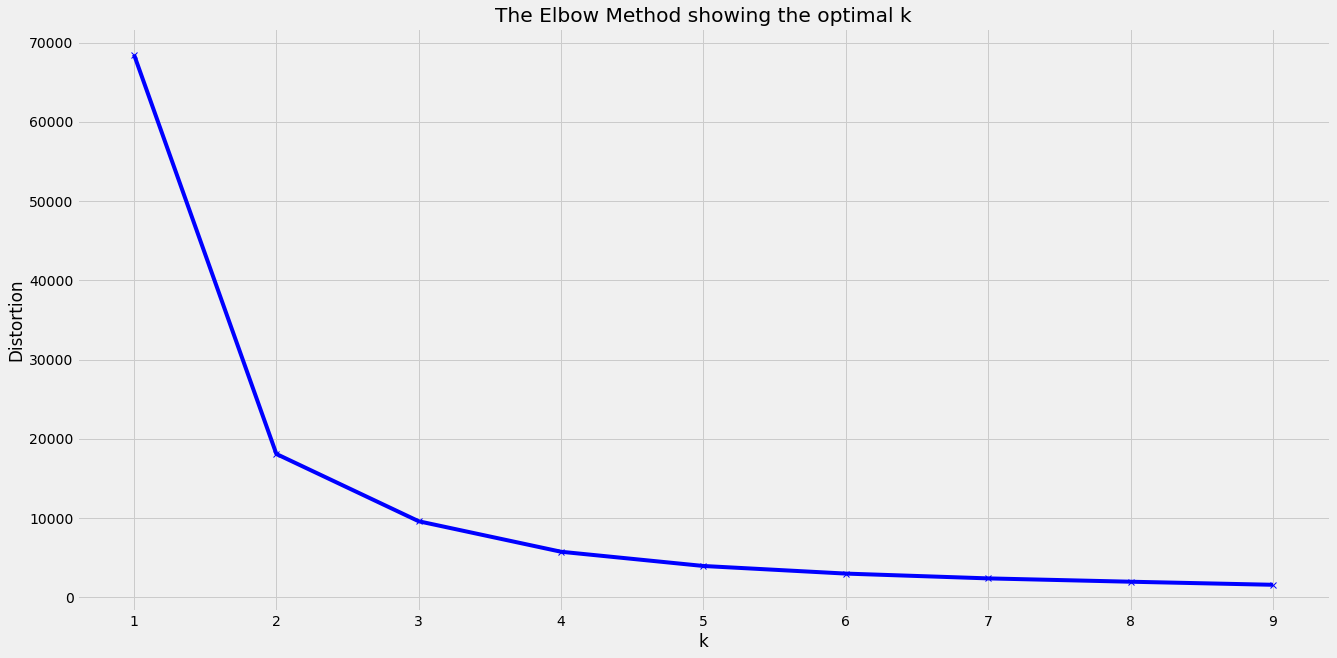

In [24]:
X = df[["Fantasy FantPt Per Game", "Fantasy PPR Per Game", "Fantasy DKPt Per Game", "Fantasy FDPt Per Game"]]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

Notice how the y-axis says 'Distortion'?  This is another way to say 'distance from the centroid or cluster average'.  As we see above, the plot looks very similar to an elbow.  We can use this to determine how many centroids (k on the x-axis) we should include in our model.  Five looks to be a pretty good fit since there is no real benefit in reducing distortion as we increase $k$.  

Now that we have our desired number of clusters and our model is fit, we can begin to see who I should pick up in the draft!  To help out with this, we'll add a column to our data that provides the group, or cluster, that each player belongs to.

In [25]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)
tiers = kmeans.labels_

In [26]:
df["tier"] = tiers

In [27]:
df["mean points"] = df[["Fantasy FantPt Per Game", "Fantasy PPR Per Game", "Fantasy DKPt Per Game", "Fantasy FDPt Per Game"]].mean(axis=1)

In [28]:
df["mean points"]

0      26.821875
1      28.051667
2      19.346667
3      18.654687
4      18.345313
         ...    
612    -0.041667
614    -1.425000
616    -0.175000
617    -0.400000
618    -0.125000
Name: mean points, Length: 557, dtype: float64

<AxesSubplot:xlabel='tier', ylabel='mean points'>

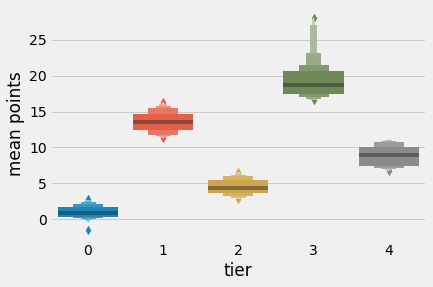

In [29]:
sns.boxenplot(df["tier"], df["mean points"])

In [30]:
# making sense of the clusters
def tier_maker(tier):
    if tier == 3:
        return 1
    elif tier == 1:
        return 2
    elif tier == 4:
        return 3
    elif tier == 2:
        return 4
    else:
        return 5

The boxplot below shows us the average value of fantasy points earned accross all four sources.  As you can see, tier 1 players (the ones we really want) tend to score roughly between 16-30 points per game.

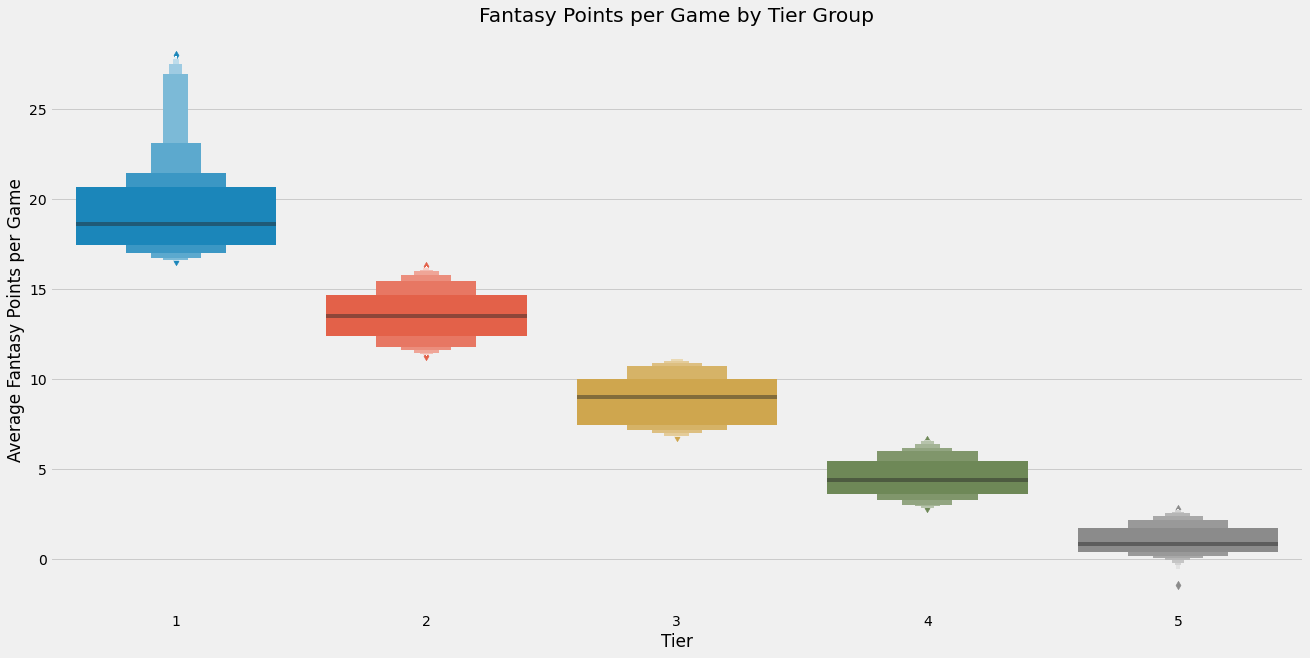

In [31]:
df["tier"] = df["tier"].apply(tier_maker)
plt.figure(figsize=(20,10))
sns.boxenplot(df["tier"], df["mean points"])
plt.ylabel('Average Fantasy Points per Game')
plt.xlabel('Tier')
plt.title('Fantasy Points per Game by Tier Group')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

With the tiers clearly outlined, we can begin to view players to draft.  Let's take a look at quarterbacks that fall under the tier one group.

In [32]:
qbs = df.query('FantPos == "QB" and tier == 1').sort_values('mean points', ascending=False).reset_index().drop('index', axis=1)
qbs.index.name = "Rank"
qbs

,Player,Tm,FantPos,Games G,Fantasy FantPt Per Game,Fantasy PPR Per Game,Fantasy DKPt Per Game,Fantasy FDPt Per Game,tier,mean points
Rank,,,,,,,,,,
0,Lamar Jackson,BAL,QB,15,27.733333,27.713333,28.646667,28.113333,1,28.051667
1,Deshaun Watson,HOU,QB,15,21.333333,21.400000,22.800000,22.166667,1,21.925000
2,Dak Prescott,DAL,QB,16,21.125000,21.112500,22.300000,21.800000,1,21.584375
3,Matthew Stafford,DET,QB,8,20.875000,20.825000,22.200000,21.450000,1,21.337500
4,Russell Wilson,SEA,QB,16,20.562500,20.537500,21.350000,20.850000,1,20.825000
5,Patrick Mahomes,KAN,QB,14,20.500000,20.500000,21.428571,20.857143,1,20.821429
6,Drew Brees,NOR,QB,11,20.454545,20.436364,21.072727,20.800000,1,20.690909
7,Jeff Driskel,DET,QB,3,19.000000,19.366667,22.700000,20.533333,1,20.400000
8,Jameis Winston,TAM,QB,16,19.062500,19.087500,21.650000,20.962500,1,20.190625


Being a fan of football, I can tell you that players like Lamar Jackson, Russell Wilson, and Aaron Rodgers are very good at what they do, which tells me that our algorithm did what it's supposed to do: assign players to tiered performance groups.

The results of the table above show an interesting finding.  Notice at the tail of the data frame, we have two quarterbacks from the Detroit Lyons, Stafford and Driskel.  Normally, quarterbacks such as Driskel would be overlooked, but with our model, we see that he isn't too shabby.  This could be useful information later on in the season if my main QB get's injured or all of the good ones are taken (given that the backup QB is actually playing that week).

### Final Thoughts

Finding Jeff Driskel in our tier one group is exactly why I wanted to conduct this project.  Back-up quarterbacks are very commonly not taken, but we know now that if Stafford is injured (hopefully not), we would have a pretty solid mid-season pick in Driskel.  He's almost gurenteed to be available throughout the season given his role in the NFL. 

Another benefit of this model is that it will make draft time less stressful.  Since the K-means algorithm succesfully classified high-performance players, I'll be better armed to build up my roster.  I won't have to panic if someone takes Lamar Jackson right away, because players in his tier performed very similar throughout the course of 2019 season, meaning that I'll still get a great player.

Thank you very much for reading my first Medium post.  Please leave any feedback so I can be a better data scientist and fantasy football player.

### References

- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/
- https://www.pro-football-reference.com/fantasy/index.htm
- https://medium.com/dunder-data/jupyter-to-medium-initial-post-ecd140d339f0

In [33]:
df.to_csv('draft.csv', index=False)